# Student Performance Indicator
## Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.
## 2.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [4]:
df=pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,standard,none,74,57,62
1,male,group E,master's degree,free/reduced,completed,66,70,70
2,female,group C,high school,free/reduced,completed,40,54,47
3,male,group B,bachelor's degree,free/reduced,none,81,83,79
4,male,group C,bachelor's degree,standard,completed,74,69,75


In [6]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->  (bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to Perform

- Check Missing values
- Check Duplicates
- check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical    column

### 3.1 Check Missing values

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There are no missing values in the data set

## 3.2 Check Duplicates

In [11]:
df.duplicated().sum()

0

There are no duplicates values in the Data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.5 Check statistics of data set

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.563000,69.583000,68.451000
std,15.643617,14.686756,15.394174
min,10.000000,25.000000,19.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66.56 and 69.58;
- All standard deviations are also close - between 14,68 and 15.64;
- While there is a minimum score 10 for math, for writing minimum is much higher 19 and for reading much higher 25


### 3.7 Exploring Data

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,standard,none,74,57,62
1,male,group E,master's degree,free/reduced,completed,66,70,70
2,female,group C,high school,free/reduced,completed,40,54,47
3,male,group B,bachelor's degree,free/reduced,none,81,83,79
4,male,group C,bachelor's degree,standard,completed,74,69,75


In [15]:
print("Categories in 'gender' variable:   ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ", end=" ")
print(df['lunch'].unique()) 

print("Categories in 'test preparation course' variable:   ", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:    ['male' 'female']
Categories in 'race/ethnicity' variable:    ['group E' 'group C' 'group B' 'group D' 'group A']
Categories in 'parental level of education' variable:    ['high school' "master's degree" "bachelor's degree" "associate's degree"
 'some high school' 'some college']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


In [16]:
# Define numerical & Categorical Columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print('we have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))


we have 3 numerical features : ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [19]:
df['Total Score']=df['math score']+df['reading score'] + df['writing score']
df['Average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,male,group E,high school,standard,none,74,57,62,193,64.333333
1,male,group E,master's degree,free/reduced,completed,66,70,70,206,68.666667
2,female,group C,high school,free/reduced,completed,40,54,47,141,47.000000
3,male,group B,bachelor's degree,free/reduced,none,81,83,79,243,81.000000
4,male,group C,bachelor's degree,standard,completed,74,69,75,218,72.666667


In [22]:
reading_full = df[df['reading score']==100]['Average'].count()
writing_full = df[df['writing score']==100]['Average'].count()
math_full = df[df['math score']==100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 16
Number of students with full marks in Writing: 26
Number of students with full marks in Reading: 20


In [24]:
reading_less_20 = df[df['reading score']<=20]['Average'].count()
writing_less_20 = df[df['writing score']<=20]['Average'].count()
math_less_20 = df[df['math score']<=20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students wih less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 5
Number of students wih less than 20 marks in Writing: 1
Number of students with less than 20 marks in Reading: 0


Insights
- From above values we get students have performed the worst in maths
- Best perfromance in the Writing section

## 4. Exploring Data (Visualization)

##### 4.1 Visualize average score distribution to make some conclusion
-Histogram
-Kernel Distribution Function(KDE)

##### 4.1.1 Histogram & KDE

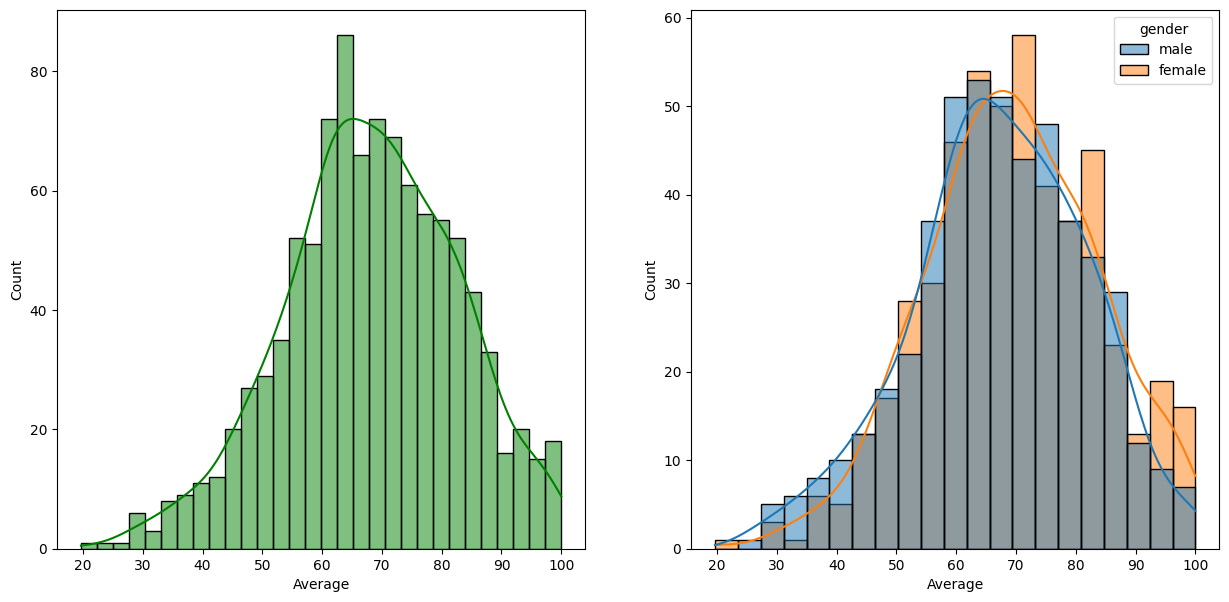

In [27]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',kde=True,hue='gender')
plt.show()

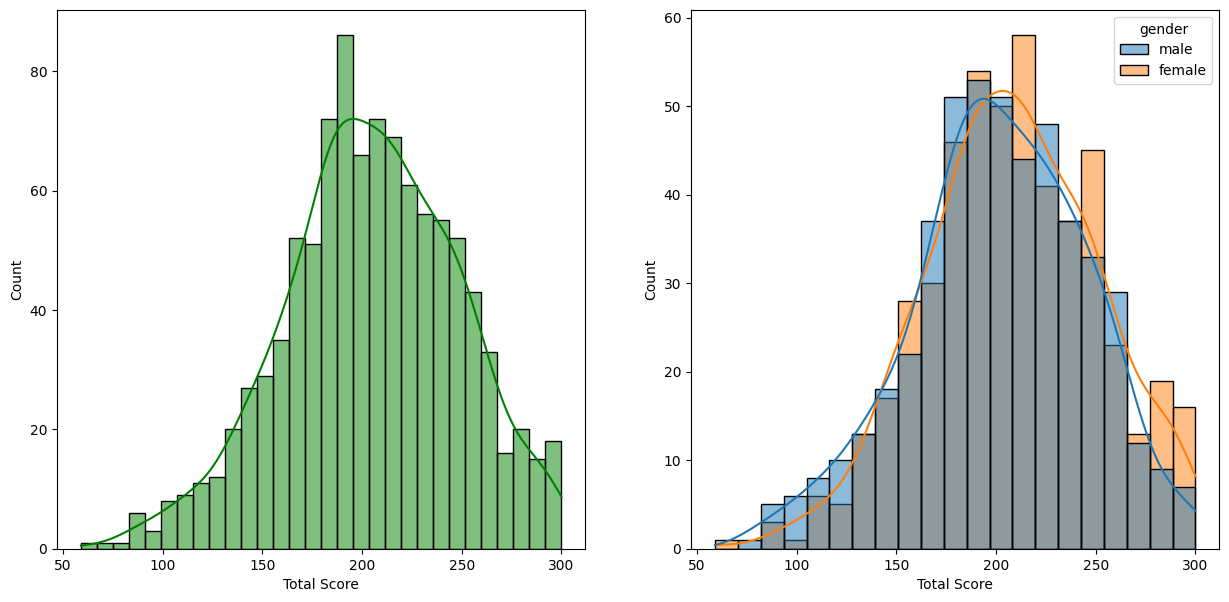

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total Score',kde=True,hue='gender')
plt.show()

Insights
- Female students tend to perform well then male students

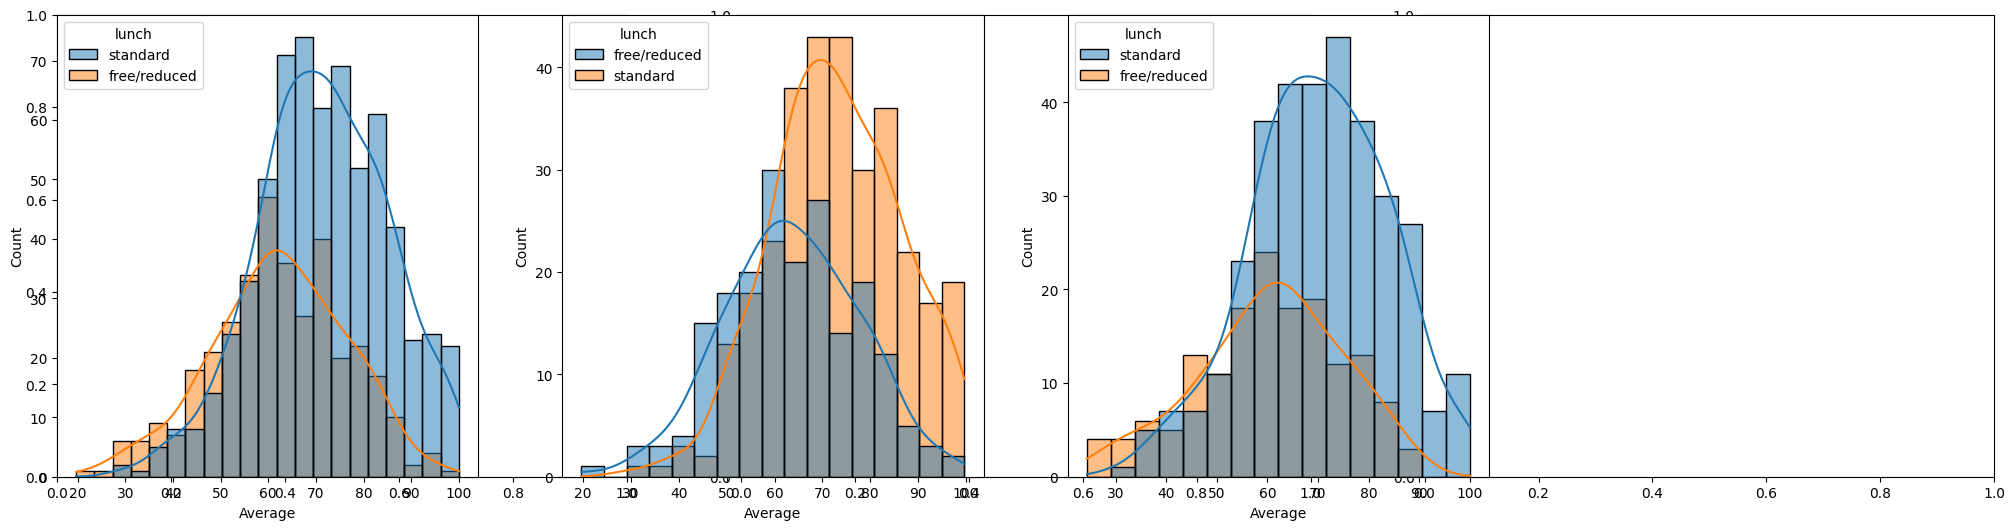

In [39]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average',kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()


Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or a female

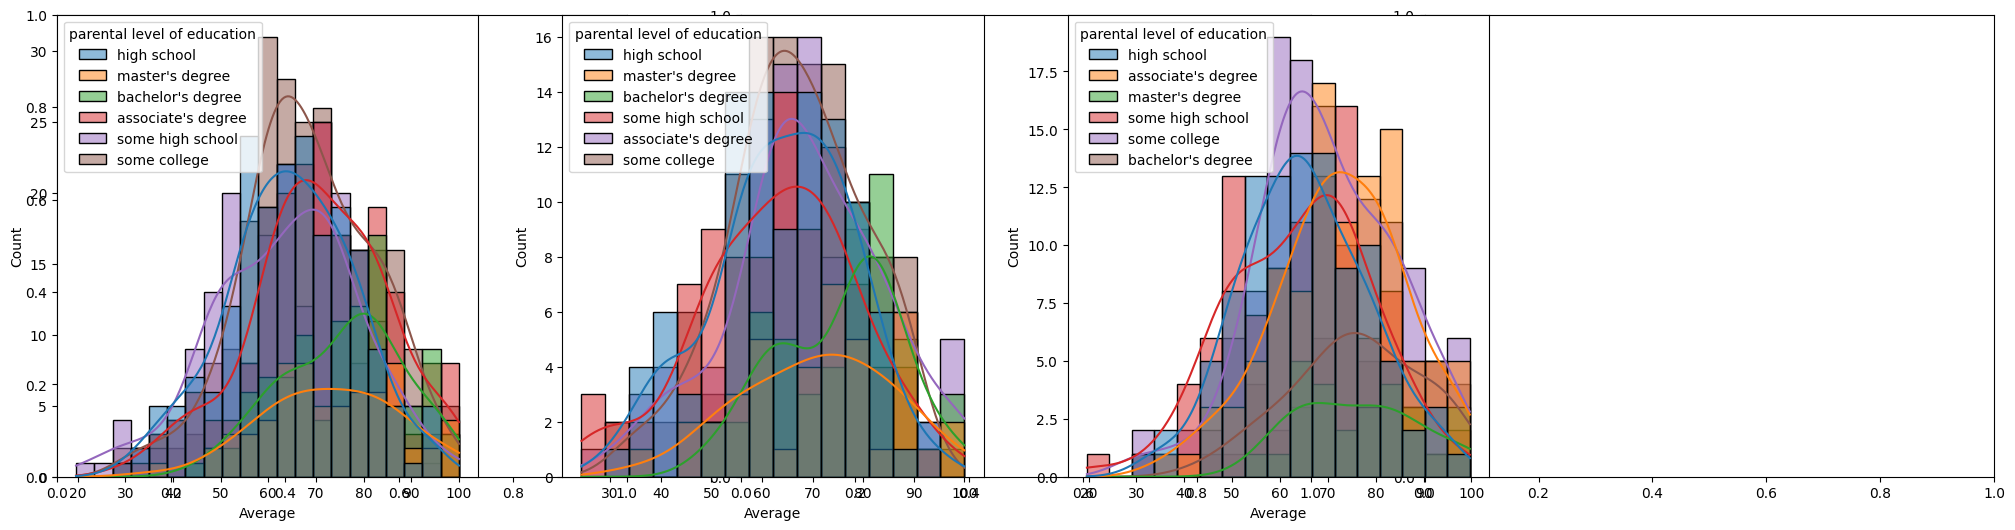

In [40]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax= sns.histplot(data=df, x= 'Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax= sns.histplot(data=df[df.gender=='male'], x= 'Average',kde=True,hue='parental level of education')
plt.subplot(143)

ax= sns.histplot(data=df[df.gender=='female'], x= 'Average',kde=True,hue='parental level of education')
plt.show()

Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

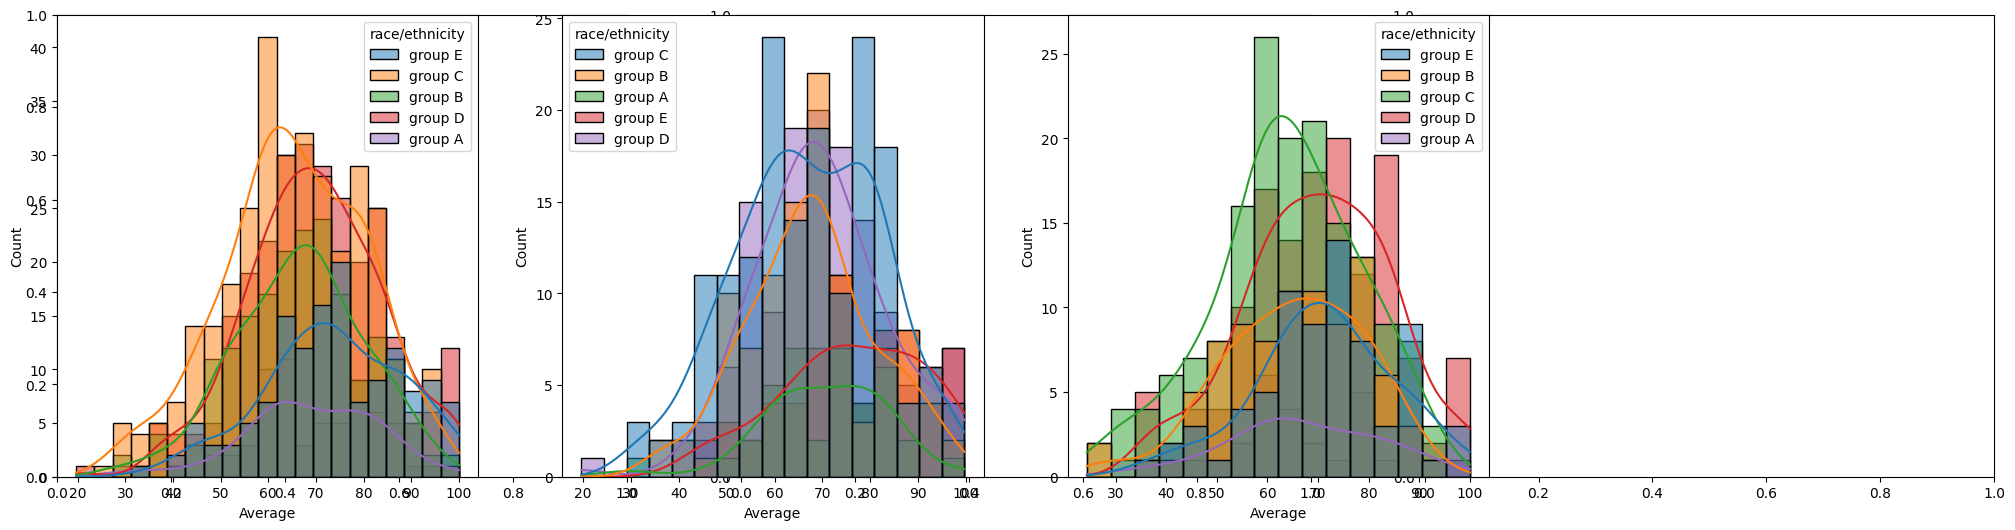

In [42]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average',kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

Insights
- Students of group A and group B tends to perform poorly in exam.
- Student of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximum score of students in all three subjects

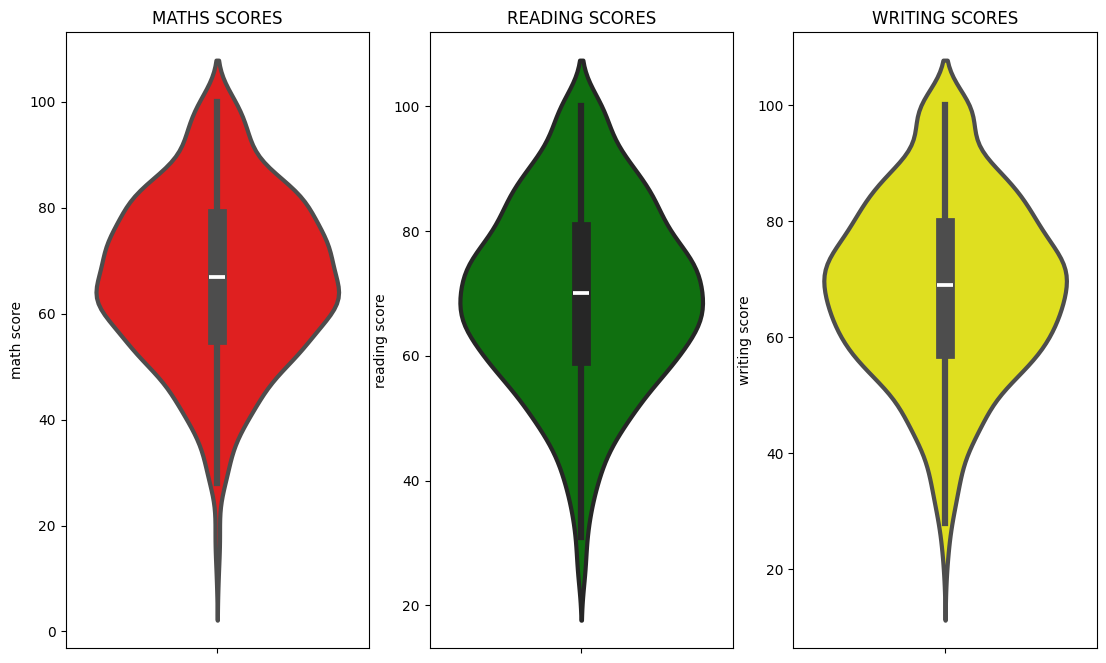

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATHS SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='yellow',linewidth=3)
plt.show()


Insights
- From the above three plots its clearly visible that most of the students score in between 40-85 in Maths whereas in reading and writing and most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

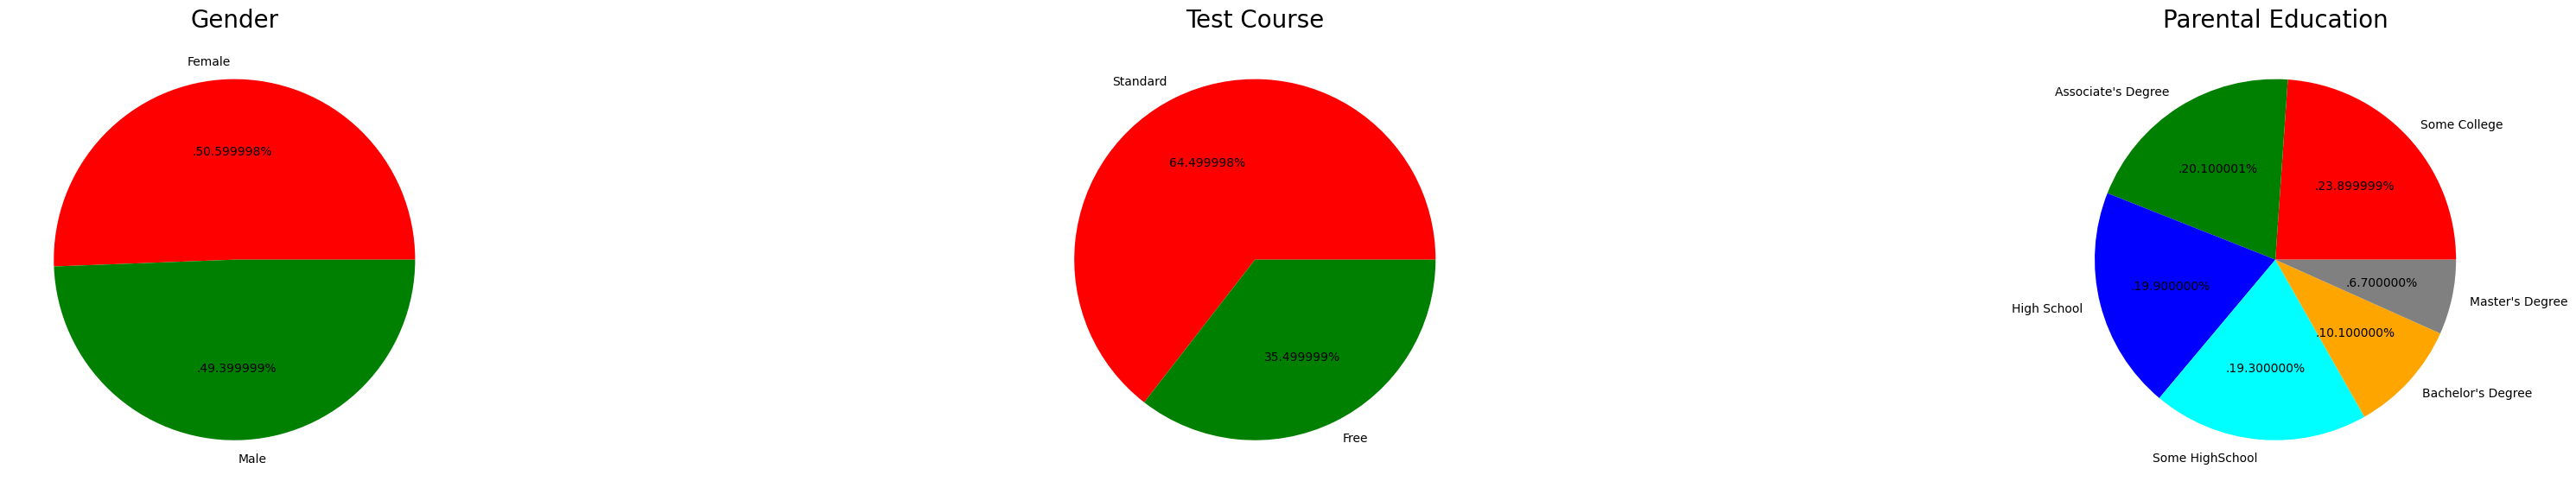

In [46]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels= 'Female','Male'
color=['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels= 'Standard', 'Free'
color=['red', 'green']

plt.pie(size, colors=color, labels= labels, autopct='%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size= df['parental level of education'].value_counts()
labels='Some College',"Associate's Degree", 'High School', 'Some HighSchool',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()



Insights
- Number of Male and Female students is almost equal
- Number of students who have standard lunch are greater
- Number students are greatest in Group C
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
- How is distribution of Gender?
- Is Gender has any impact on student's performance?


### UNIVARIATE ANALYSIS (How is distribution of Gender?)

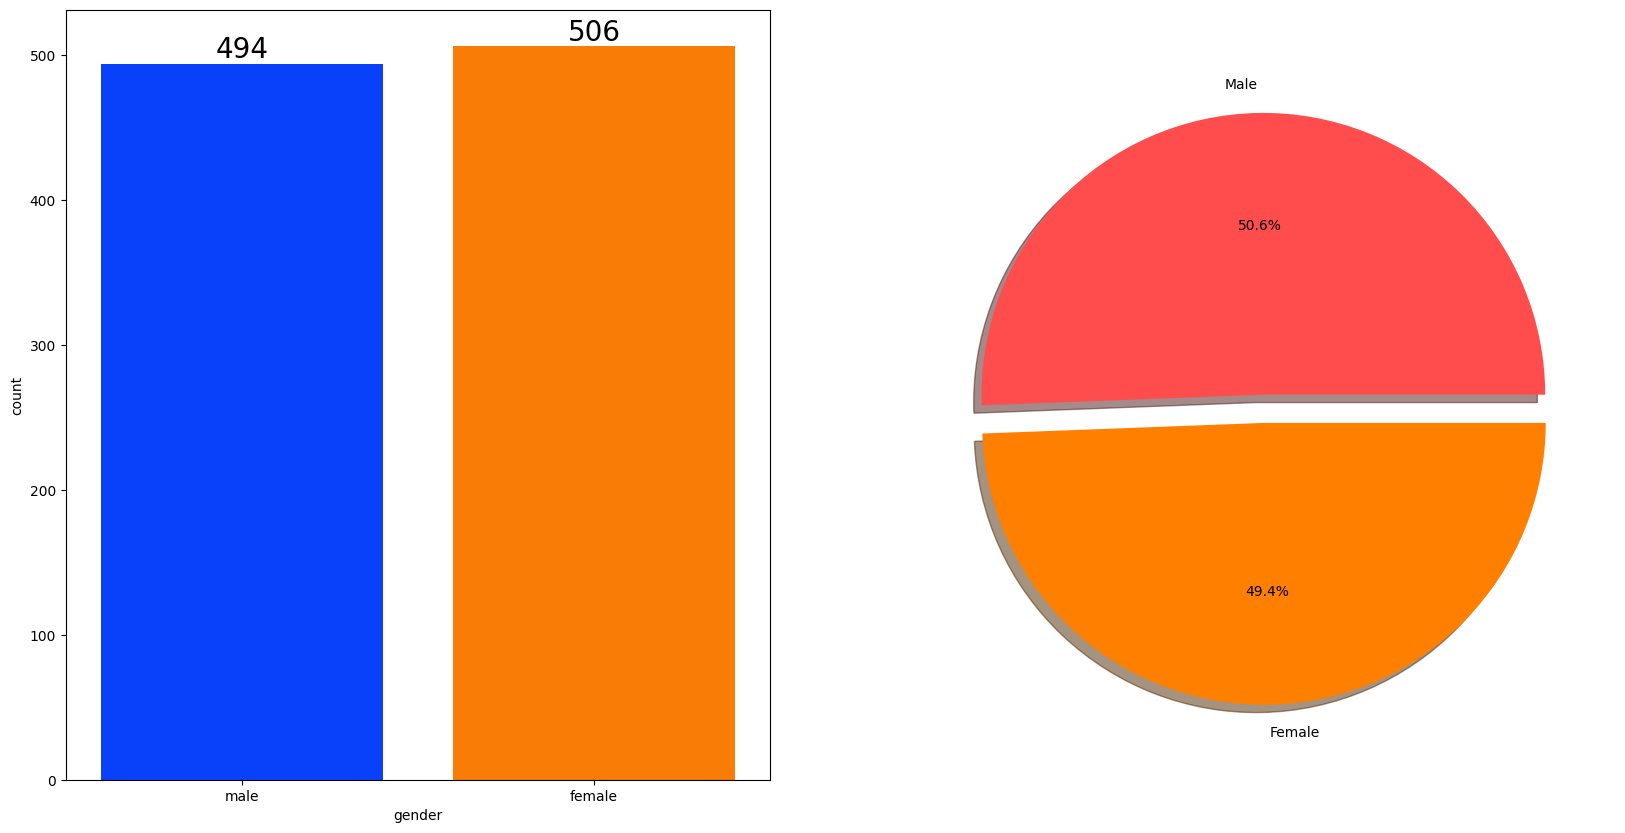

In [47]:
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 518
(48%) and male students are 482(52%)

### BIVARIATE ANALYSIS (Is gender has any impact on students's performance?)

In [53]:
#dtypes.df['gender']

In [56]:
# gender_group = df.groupby('gender').mean()
# gender_group

In [58]:
'''
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

'''

'\nplt.figure(figsize=(10, 8))\n\nX = [\'Total Average\',\'Math Average\']\n\n\nfemale_scores = [gender_group[\'average\'][0], gender_group[\'math score\'][0]]\nmale_scores = [gender_group[\'average\'][1], gender_group[\'math score\'][1]]\n\nX_axis = np.arange(len(X))\n  \nplt.bar(X_axis - 0.2, male_scores, 0.4, label = \'Male\')\nplt.bar(X_axis + 0.2, female_scores, 0.4, label = \'Female\')\n  \nplt.xticks(X_axis, X)\nplt.ylabel("Marks")\nplt.title("Total average v/s Math average marks of both the genders", fontweight=\'bold\')\nplt.legend()\nplt.show()\n\n'

Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

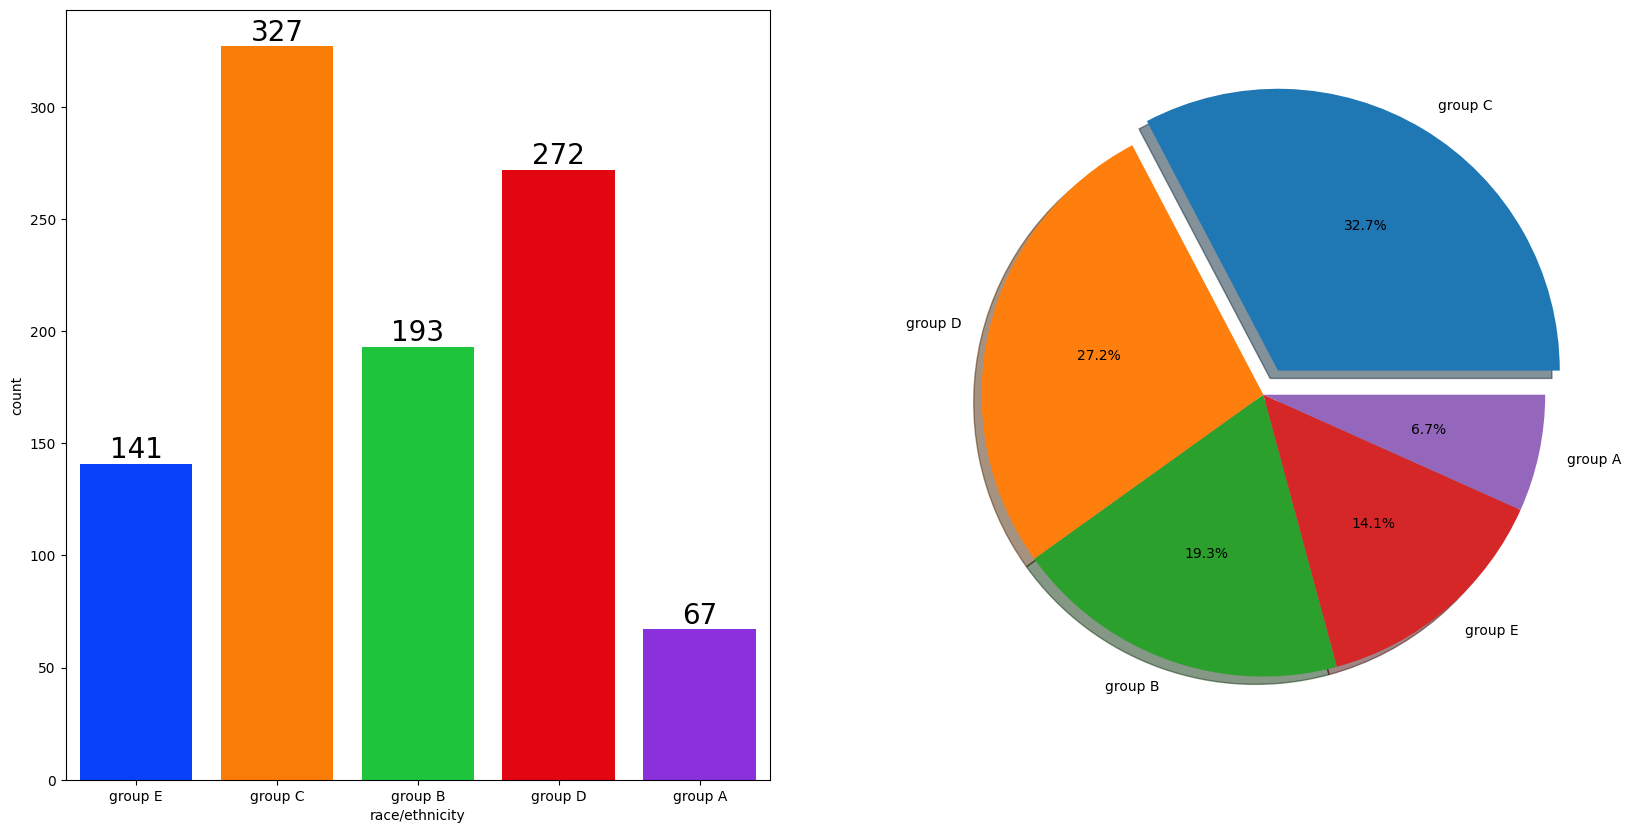

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

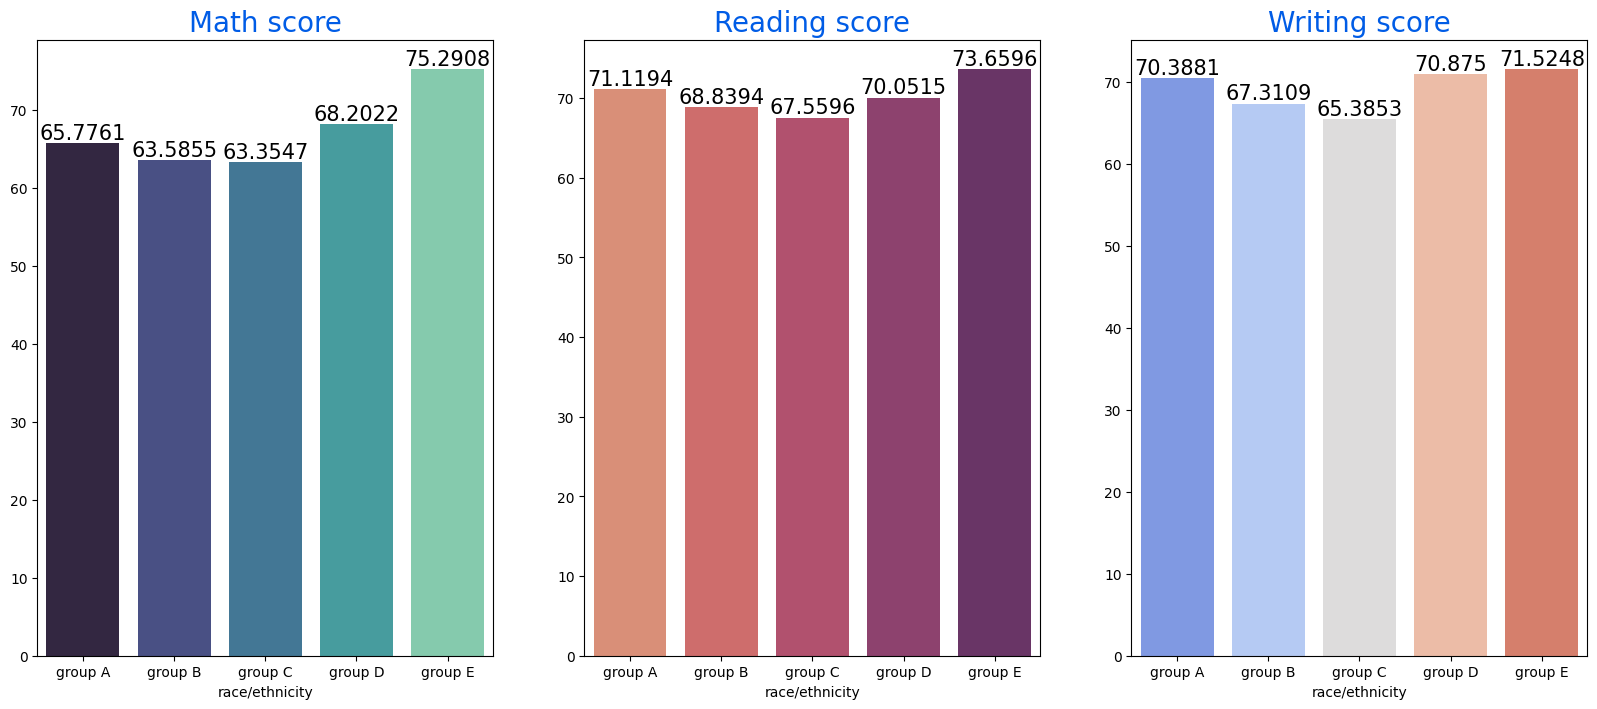

In [62]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### **UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

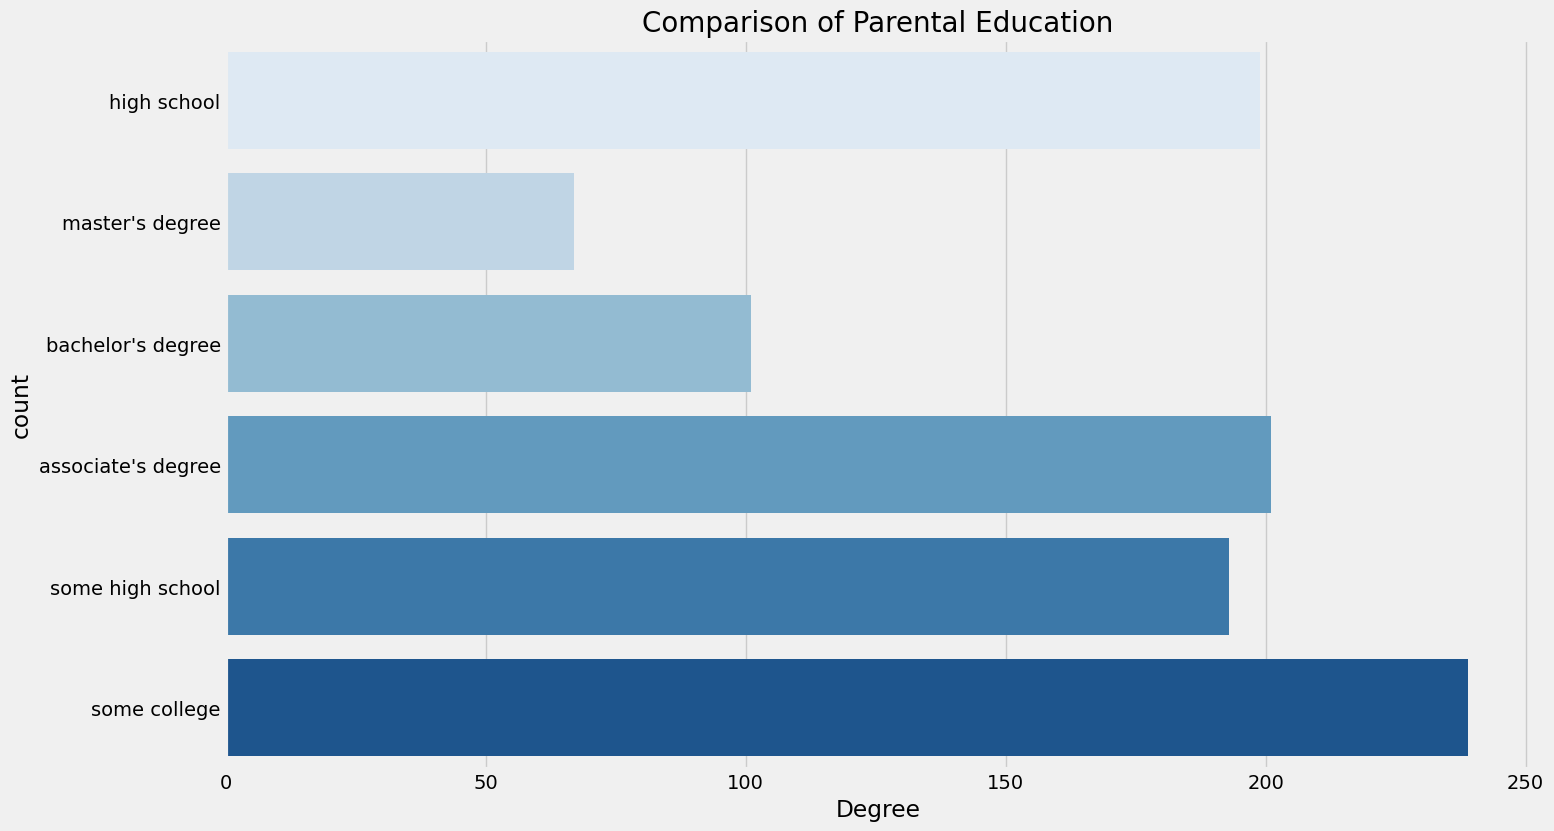

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
- Largest number of parents are from some college.


#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [76]:
'''
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
'''

"\ndf.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))\nplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\nplt.show()\n"

In [67]:
'''

df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

'''



"\n\ndf.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))\nplt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)\nplt.show()\n\n"

Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### **UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**

In [69]:
'''
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()
'''

"\nplt.rcParams['figure.figsize'] = (15, 9)\nplt.style.use('seaborn-talk')\nsns.countplot(df['lunch'], palette = 'PuBu')\nplt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)\nplt.xlabel('types of lunch')\nplt.ylabel('count')\nplt.show()\n"

Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

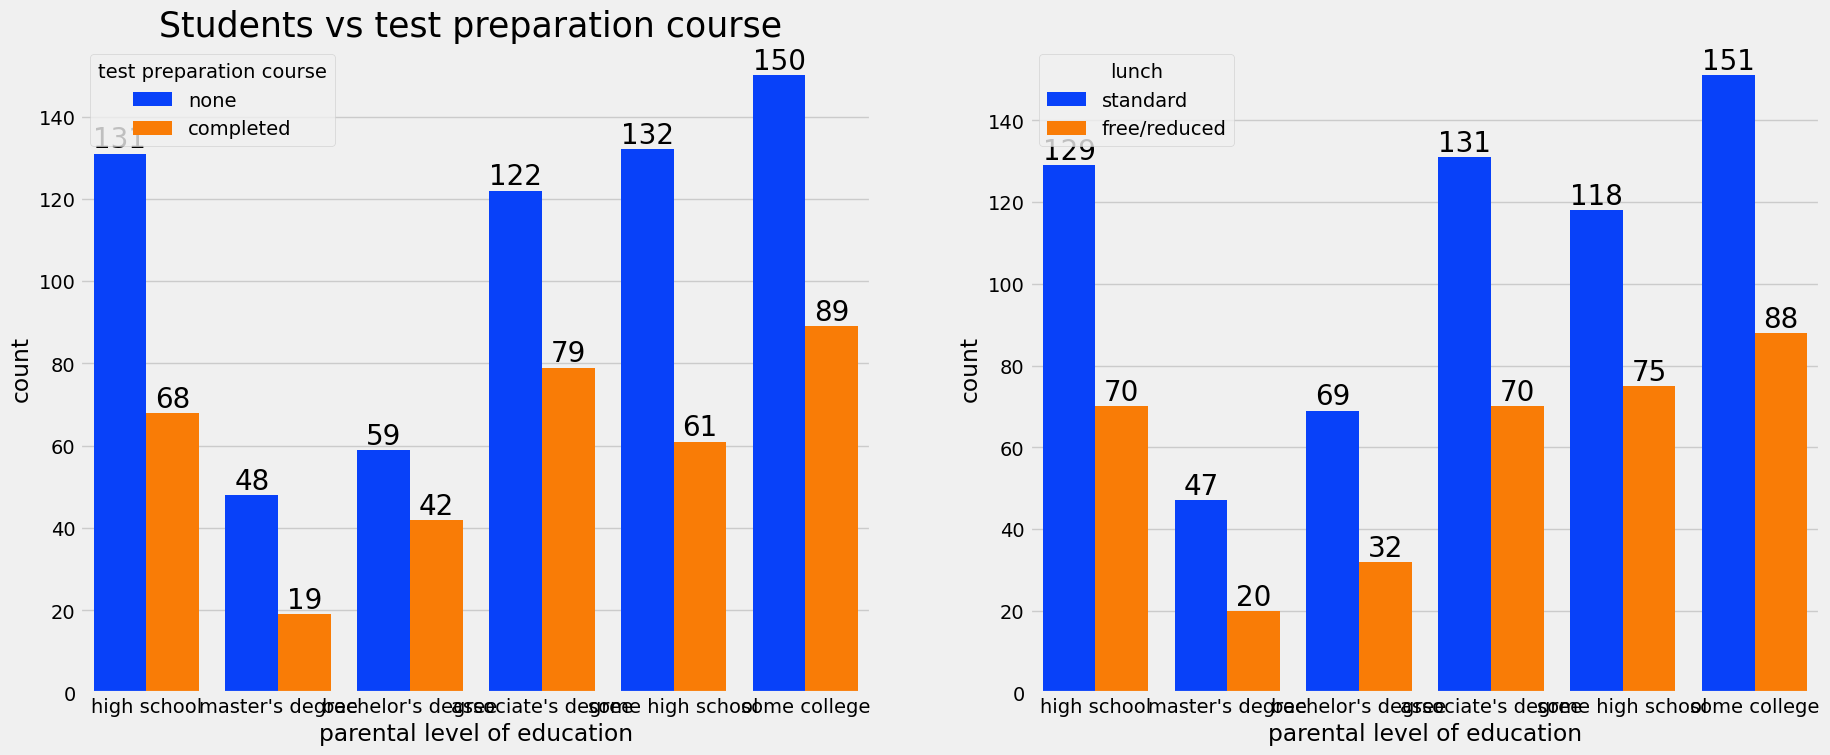

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

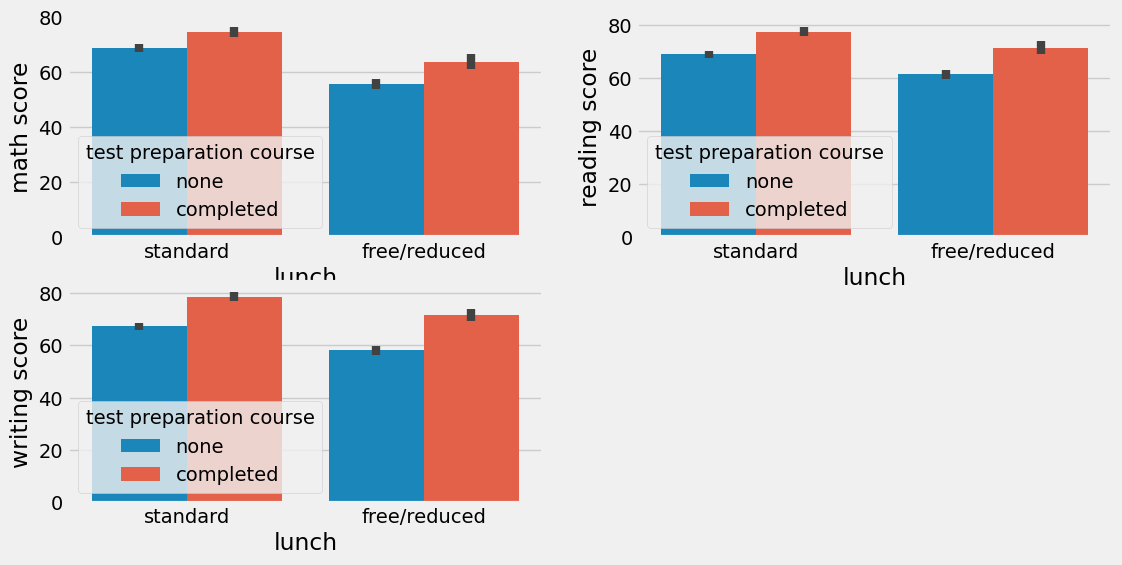

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### 4.4.6 CHECKING OUTLIERS

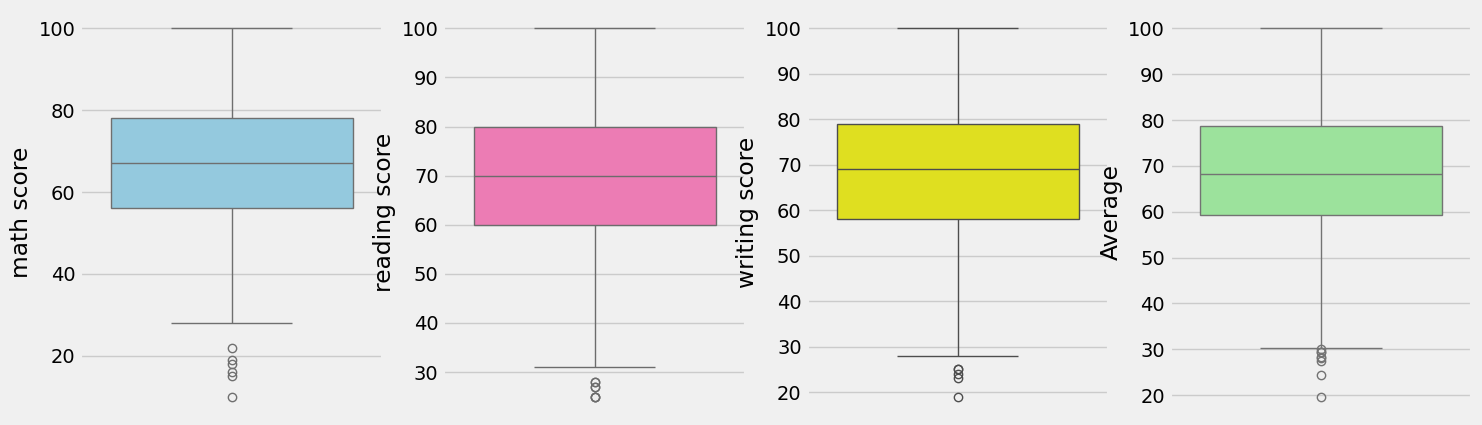

In [73]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

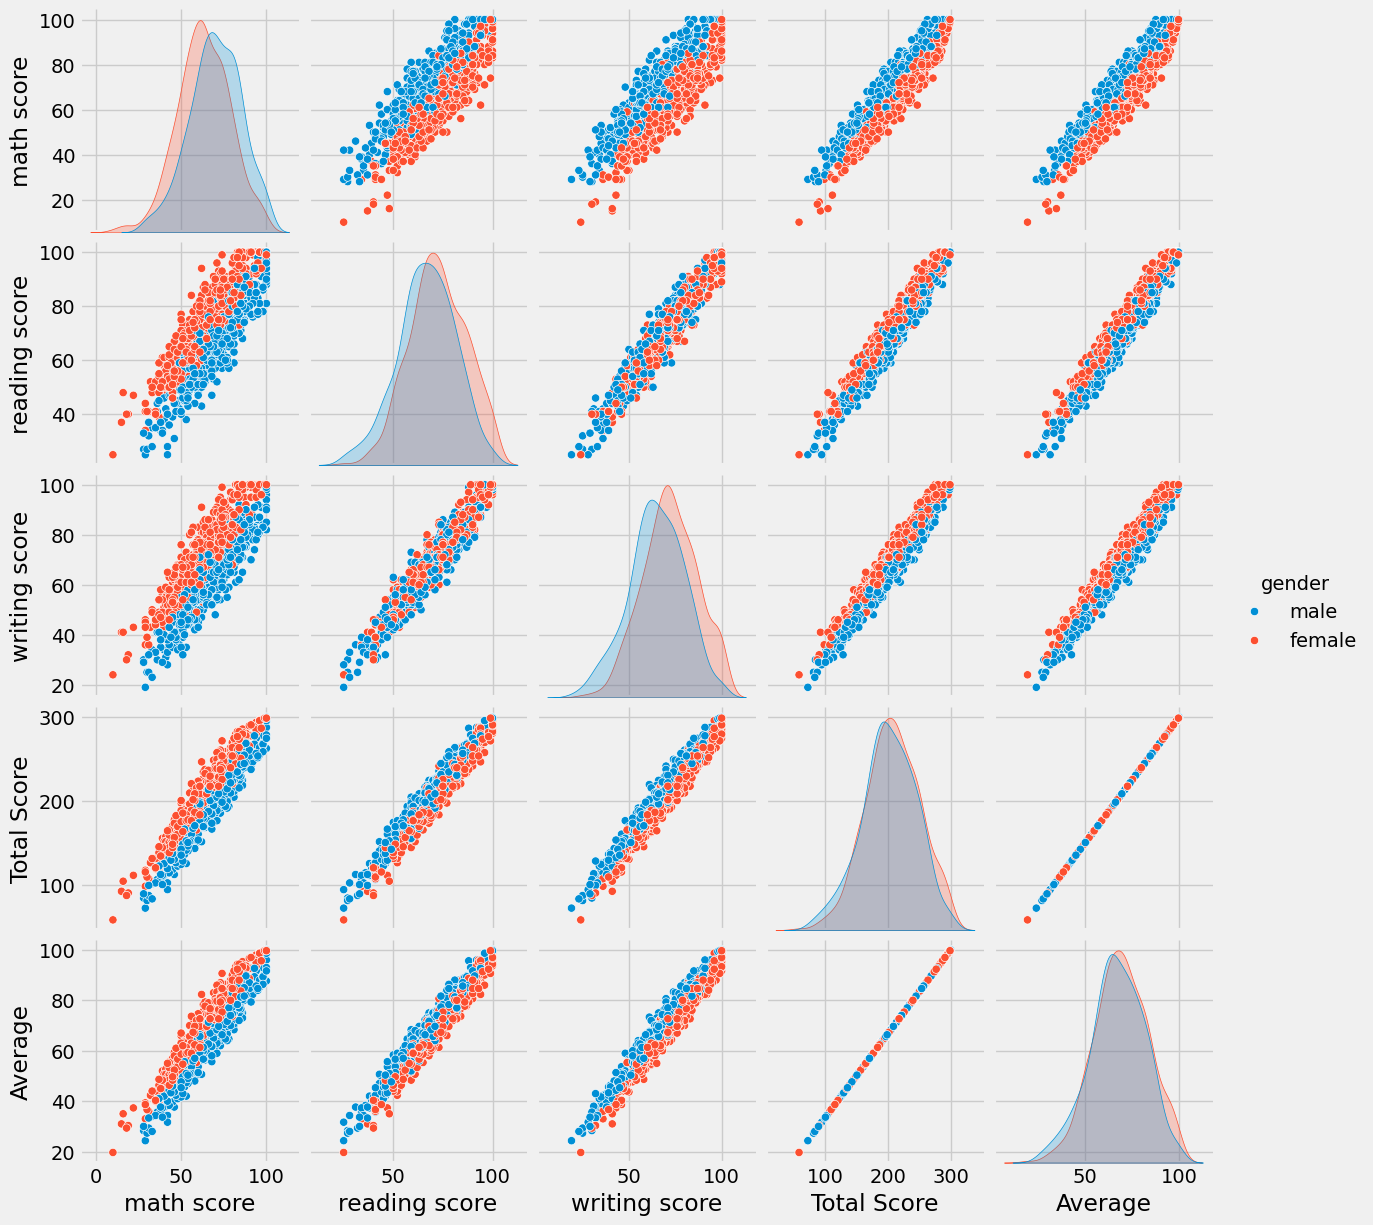

In [74]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.